In [14]:
import pickle

from sklearn.metrics import accuracy_score
import torch
from tqdm import tqdm

In [15]:
def load(filename: str) -> tuple:
    with open(filename, 'rb') as f:
        (X, y) = pickle.load(f)
    X = torch.from_numpy(X.astype(float)).float()
    y = torch.from_numpy(y.astype(float)).long()
    return (X, y)

In [16]:
filename = 'data/train.pkl'
(X_train, y_train) = load(filename)

In [17]:
filename = 'data/valid.pkl'
(X_valid, y_valid) = load(filename)

In [18]:
class NNModel(torch.nn.Module):
    def __init__(self, n_input: int, n_output: int, n_hidden: int=256):
        super(NNModel, self).__init__()
        self.linear_1 = torch.nn.Linear(n_input, n_hidden)
        self.linear_2 = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x: torch.Tensor) -> float:
        x = self.linear_1(x)
        x = self.linear_2(x)
        return torch.softmax(x, dim=1)

In [28]:
model = NNModel(300, 4)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1.0)

In [29]:
model.train()
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

epochs = 20
batch_size = 256
for epoch in tqdm(range(1, epochs+1)):
    model.train()
    for i in range(0, X_train.shape[0], batch_size):
        x = X_train[i:i+batch_size]
        y = y_train[i:i+batch_size]
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        accuracy = (y_pred.argmax(dim=1) == y_train).sum().item()/y_train.shape[0]
        train_losses.append(loss.item())
        train_accuracies.append(accuracy)
    
    with torch.no_grad():
        y_pred = model(X_valid)
        loss = criterion(y_pred, y_valid)
        accuracy = (y_pred.argmax(dim=1) == y_valid).sum().item()/y_valid.shape[0]
        valid_losses.append(loss.item())
        valid_accuracies.append(accuracy)
    
    # torch.save({
    #     'epoch': epoch,
    #     'model_state_dict': model.state_dict(),
    #     'optimizer_state_dict': optimizer.state_dict(),
    #     'loss': loss
    # }, f'models/model_{epoch}.pkl')

100%|██████████| 20/20 [02:00<00:00,  6.03s/it]


In [30]:
import matplotlib.pyplot as plt

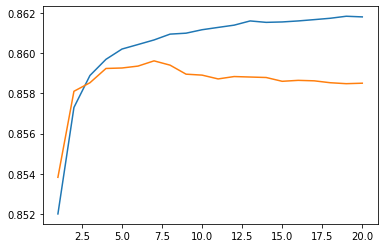

In [31]:
fix, ax = plt.subplots()
ax.plot(list(range(1, len(train_accuracies)+1)), train_accuracies, label='train_accuracy')
ax.plot(list(range(1, len(valid_accuracies)+1)), valid_accuracies, label='valid_accuracy')
plt.show()

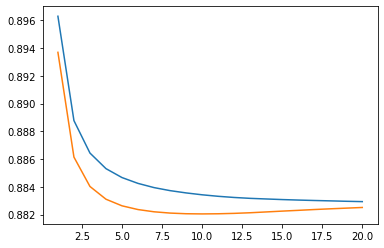

In [32]:
fix, ax = plt.subplots()
ax.plot(list(range(1, len(train_losses)+1)), train_losses, label='train_loss')
ax.plot(list(range(1, len(valid_losses)+1)), valid_losses, label='valid_loss')
plt.show()